# Task2: User Engagement Analysis

In [27]:
# import requiered python libraries

import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go  
import matplotlib.pyplot as plt
from IPython.display import Image
from sklearn import preprocessing
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler, normalize

In [28]:
import os
import sys
import warnings
warnings.filterwarnings('ignore')
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from dataframe_outlier import *
from plot_data import *

In [29]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option("expand_frame_repr", False)
pd.set_option('display.float_format', '{:.2f}'.format)

In [30]:
# load and read the cleaned data
df_cleaned = pd.read_csv('../data/cleaned_Telecom_data.csv')
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148506 entries, 0 to 148505
Data columns (total 54 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unnamed: 0                      148506 non-null  int64  
 1   Unnamed:_0                      148506 non-null  int64  
 2   Bearer_Id                       148506 non-null  float64
 3   Start                           148506 non-null  object 
 4   Start_ms                        148506 non-null  int64  
 5   End                             148506 non-null  object 
 6   End_ms                          148506 non-null  int64  
 7   Dur._(ms)                       148506 non-null  int64  
 8   IMSI                            148506 non-null  float64
 9   MSISDN_Number                   148506 non-null  float64
 10  IMEI                            148506 non-null  float64
 11  Last_Location_Name              148506 non-null  object 
 12  Avg_RTT_DL_(ms) 

In [31]:
#Aggregate the above metrics per customer id (MSISDN) and report the top 10 customers per engagement metric
df_user_engage =  df_cleaned[['MSISDN_Number', 'Bearer_Id', 'Dur._(ms)', 'Total_Data_(Bytes)']].copy().rename(columns={
    'Bearer_Id': 'Session_Frequency', 'MSISDN_Number':'Customer_Id', 'Dur._(ms)': 'Duration', 'Total_Data_(Bytes)': 'Total_Data_Volume'})

In [32]:
user_engage = df_user_engage.groupby('Customer_Id').agg({'Session_Frequency': 'count', 'Duration': 'sum', 'Total_Data_Volume': 'sum'})
user_engage.head(10)

,Session_Frequency,Duration,Total_Data_Volume
Customer_Id,,,
33601001722.00,1,116720,878690574
33601001754.00,1,181230,156859643
33601002511.00,1,134969,595966483
33601007832.00,1,49878,422320698
33601008617.00,2,37104,1457410944
33601010682.00,2,253983,615217221
33601011634.00,2,128360,654723066
33601011959.00,1,86399,332660357
33601014694.00,2,242249,990132189


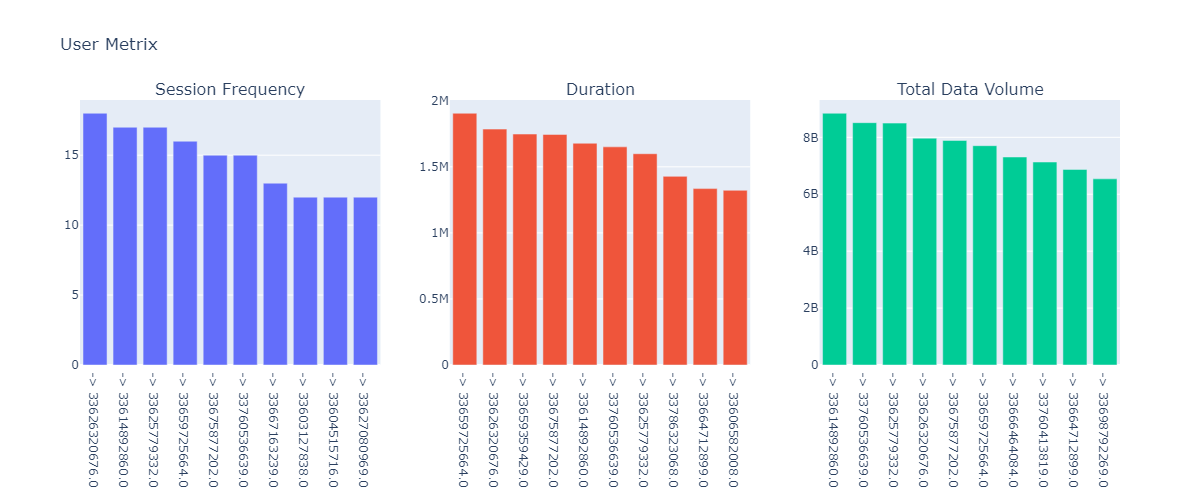

In [33]:
sessions = user_engage.nlargest(10, "Session_Frequency")['Session_Frequency']
duration = user_engage.nlargest(10, "Duration")['Duration']
total_data_volume = user_engage.nlargest(10, "Total_Data_Volume")['Total_Data_Volume']

mult_hist([sessions, duration, total_data_volume], 1,
          3, "User Metrix", ['Session Frequency', 'Duration', 'Total Data Volume'])


normalize the engagement metric and a k-means(k=3) cluturing for classification

<AxesSubplot:>

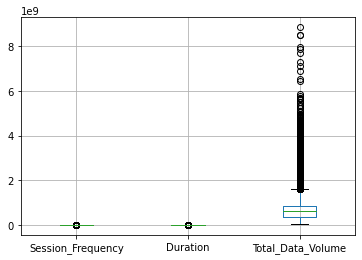

In [34]:
#check the outlier
user_engage.boxplot()

<AxesSubplot:>

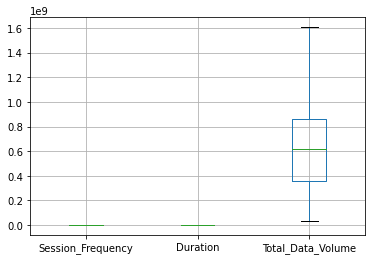

In [35]:
# removing outliers
replace_outliers_with_iqr(user_engage, ['Session_Frequency', 'Duration', 'Total_Data_Volume'])
user_engage.boxplot()

In [36]:
# Normalizing the engagement metrics
scaler = StandardScaler()
scaled_engage = scaler.fit_transform(user_engage)
pd.DataFrame(scaled_engage).head(10)

,0,1,2
0,-0.55,-0.07,0.54
1,-0.55,0.74,-1.28
2,-0.55,0.16,-0.17
3,-0.55,-0.92,-0.61
4,0.98,-1.08,2.00
5,0.98,1.66,-0.12
6,0.98,0.07,-0.02
7,-0.55,-0.46,-0.84
8,0.98,1.51,0.82
9,-0.55,0.03,0.17


In [ ]:
normalized_data = normalize(scaled_engage)